# Caelan Osman
## Math 436, Sec. 2
## Oct 1, 2021

In [1]:
import sympy as sy
import numpy as np
from scipy.linalg import expm
from matplotlib import pyplot as plt

# Exercise 5.1

we can use Duhamels' Principle to solve the system
\begin{align*}
\boldsymbol{x}'(t) &= A \boldsymbol{x}(t)\quad \text{where}\\
A &= 
\begin{bmatrix}
-1 & 1\\
1 & 1
\end{bmatrix}
\quad \text{and} \quad
\boldsymbol{x}(0) = 
\begin{bmatrix}
2\\1
\end{bmatrix}
\end{align*}
This is an autonomous homogenous system so our solution is given by the fundamental matrix soluiton. That is,
\begin{align*}
\boldsymbol{x}(t) &= e^{At}\boldsymbol{x}_0 =\Phi(t)\boldsymbol{x}_0
\end{align*}
we now use SymPy to solve analytically.

In [2]:
t= sy.symbols('t')
A = sy.Matrix([[-1, 1], 
               [1, 1]])

x0_1 = sy.Matrix([2, 1])

Φ = sy.simplify(sy.exp(A*t))
x = sy.simplify(Φ*x0_1)
#sy.latex(x)

Which gives the fundamental matrix as 
\begin{align*}
\Phi(t) &= \left[\begin{matrix}\frac{\left(- \sqrt{2} e^{2 \sqrt{2} t} + 2 e^{2 \sqrt{2} t} + \sqrt{2} + 2\right) e^{- \sqrt{2} t}}{4} & \frac{\left(- \sqrt{2} e^{2 \sqrt{2} t} + 2 e^{2 \sqrt{2} t} - 2 + \sqrt{2}\right) e^{- \sqrt{2} t}}{4 \left(-1 + \sqrt{2}\right)}\\ \frac{\sqrt{2} \sinh{\left(\sqrt{2} t \right)}}{2} & \frac{\left(- 2 e^{2 \sqrt{2} t} + \sqrt{2} e^{2 \sqrt{2} t} - 10 + 7 \sqrt{2}\right) e^{- \sqrt{2} t}}{4 \left(-3 + 2 \sqrt{2}\right)}\end{matrix}\right]
\end{align*}

Then our solution becomes
\begin{align*}
\boldsymbol{x}(t) &=
\left[\begin{matrix}\frac{\left(- 6 e^{2 \sqrt{2} t} + 5 \sqrt{2} e^{2 \sqrt{2} t} - 2 + 3 \sqrt{2}\right) e^{- \sqrt{2} t}}{4 \left(-1 + \sqrt{2}\right)}\\ \frac{\left(- \sqrt{2} e^{2 \sqrt{2} t} + 2 e^{2 \sqrt{2} t} + 4 \sqrt{2} \left(3 - 2 \sqrt{2}\right) e^{\sqrt{2} t} \sinh{\left(\sqrt{2} t \right)} - 7 \sqrt{2} + 10\right) e^{- \sqrt{2} t}}{4 \left(3 - 2 \sqrt{2}\right)}\end{matrix}\right]
\end{align*}
Below is code to numerically check that our answer matches what it should.

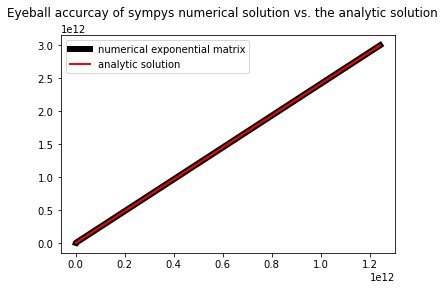

In [3]:
#initial condition and system matrix
A1 = np.array([[-1, 1], [1, 1]])
x01 = np.array([2, 1])

#numerical solution using expm
sol1 = lambda t: expm(A1 * t) @ x0_1


#sympy analytic solutions
def x1a(t):
    numerator = (-6*np.exp(2*t*np.sqrt(2)) + 5*np.sqrt(2)*np.exp(2*t*np.sqrt(2)) - 2 
                 + 3*np.sqrt(2)) * np.exp(-np.sqrt(2)*t)
    denominator = 4*(-1+ np.sqrt(2))
    
    
    return numerator/denominator

def x2a(t):
    numerator = (-np.sqrt(2)*np.exp(2*np.sqrt(2)*t)+ 2*np.exp(2*np.sqrt(2)*t)
                 +4*np.sqrt(2)*(3 - 2*np.sqrt(2))*np.exp(np.sqrt(2)*t)*
                 np.sinh(np.sqrt(2)*t) - 7*np.sqrt(2)+10)*np.exp(-np.sqrt(2)*t)
    denominator = 4*(3 - 2*np.sqrt(2)) 
   
    return numerator/denominator

    
    

#We now plot the phase field 
#numerical sol
t_vals = np.linspace(0, 20, 200)
outputN = np.array([sol1(t) for t in t_vals])
#analytic
ouputA = np.array([[x1a(t), x2a(t)] for t in t_vals])

plt.plot( outputN[:, 0],outputN[:, 1],'k-', lw=6, label='numerical exponential matrix' )
plt.plot(ouputA[:, 0], ouputA[:, 1], 'r-', lw=2, label='analytic solution')
plt.legend(loc='best')
plt.suptitle('Eyeball accurcay of sympys numerical solution vs. the analytic solution')
plt.show()

# Exercise 5.2

We now find a solution to the same system but instead with $\tilde{\boldsymbol{x}}_0 = \begin{bmatrix}2 & 0\end{bmatrix}^T$. The fundamental matrix will stay the same and the solution will be given by $\tilde{\boldsymbol{x}} = \Phi(t)\tilde{\boldsymbol{x}}$. We again use sympy to simplify everything. 

In [4]:
x0_2 = sy.Matrix([2, 0])

x_tilde = sy.simplify(Φ*x0_2)
#sy.latex(x_tilde)

Which gives our solution as 
\begin{align*}
\tilde{\boldsymbol{x}}(t) &=
\left[\begin{matrix}\frac{\left(- \sqrt{2} e^{2 \sqrt{2} t} + 2 e^{2 \sqrt{2} t} + \sqrt{2} + 2\right) e^{- \sqrt{2} t}}{2}\\\sqrt{2} \sinh{\left(\sqrt{2} t \right)}\end{matrix}\right]
\end{align*}
We now find the 2 norm between $\boldsymbol{x}(t)$ and $\tilde{\boldsymbol{x}}(t)$ also using sympy. That is we find $\lVert\boldsymbol{x}(t) - \tilde{\boldsymbol{x}}(t)\rVert_2 = \sqrt{\langle(\boldsymbol{x}(t) - \tilde{\boldsymbol{x}}(t)), (\boldsymbol{x}(t) - \tilde{\boldsymbol{x}}(t)) \rangle}$

In [5]:
norm = sy.simplify(sy.sqrt((x-x_tilde).dot((x-x_tilde))))
#sy.latex(sy.simplify(norm))

Which gives the norm as 
\begin{align*}
\lVert\boldsymbol{x}(t) - \tilde{\boldsymbol{x}}(t)\rVert_2 &=
\frac{\sqrt{\left(\left(58 - 41 \sqrt{2}\right) e^{4 \sqrt{2} t} - 239 \sqrt{2} + 338\right) e^{- 2 \sqrt{2} t}} \left(7 + 5 \sqrt{2}\right)}{2}
\end{align*}

# Exercise 5.3

We classify the type of equilibrium solution for the given matrices. This is done by finding the eigenvalues of the matrices. 

1. 

\begin{align*} A &= 
    \begin{bmatrix}
    1 & 0\\4 & 2
    \end{bmatrix}\\
    \lambda_1, \lambda_2 &= 2, 1
    \end{align*}
Since the eigenvalues are both real and greater than zero therefore the equilibrium solution is unstable in all directions. I.e. this is an unstable node
    
2. 
\begin{align*}
 A&=
        \begin{bmatrix}
        1 & 1\\
        -1 &1
        \end{bmatrix}\\
        \lambda &= 1 \pm i
    \end{align*}
Since the eigenvalues are complex with a positive real part then this is an unstable spiral. I.e. an unstable spiral node

# Exericse 5.4

We do the exact same analysis as in the last problem. 

1.
\begin{align*}
        A &= 
        \begin{bmatrix}
        1 & -5\\
        1 & -1
        \end{bmatrix}\\
        \lambda &= \pm 2i
    \end{align*}
Because the eigenvalues are purely imaginary the solutions will be time periodic making the origin stable but not asymptotically stable. Solutions do not decay to 0. This is a center. 


2. 
\begin{align*}
A &= 
        \begin{bmatrix}
        1 & 1\\
        0 & -1
        \end{bmatrix}\\
        \lambda &= \pm 1
    \end{align*}
    Because we have two real eigenvalues that switch signs this means that there is a stable direction in the eigenspace of $\lambda_1 =-1$ but an unstable direction along th eigenspace of $\lambda_2 =1$. i.e. this is a saddle point. 